In [1]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

In [2]:
% matplotlib inline

## Linear Regressions as an Exploratory Tool

## Objectives

* How to analyze the distributions in your data with scatterplots and histograms

* How to use data relationships to get results

* Interepretation of statsmodels coefficient tables

## **Class Notes**

### Understanding distributions

Load in the following data set about mammals and their sleeping patterns. The columns of the dataset are defined as followed:

* name: common name
* genus
* vore: carnivore, omnivore or herbivore?
* order
* conservation: the conservation status of the animal
* sleep_total: total amount of sleep, in hours
* sleep_rem: rem sleep, in hours
* sleep_cycle: length of sleep cycle, in hours
* awake: amount of time spent awake, in hours
* brainwt: brain weight in kilograms
* bodywt: body weight in kilograms

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

c:\Users\James\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [5]:
sns.set_style('white')
spat = pd.read_csv("C:\Users\James\Desktop\Classess\GADataScience\Class_Notes\msleep.csv")

,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
count,83.000000,61.000000,32.000000,83.000000,56.000000,83.000000
mean,10.433735,1.875410,0.439583,13.567470,0.281581,166.136349
std,4.450357,1.298288,0.358680,4.452085,0.976414,786.839732
min,1.900000,0.100000,0.116667,4.100000,0.000140,0.005000
25%,7.850000,0.900000,0.183333,10.250000,0.002900,0.174000
50%,10.100000,1.500000,0.333333,13.900000,0.012400,1.670000
75%,13.750000,2.400000,0.579167,16.150000,0.125500,41.750000
max,19.900000,6.600000,1.500000,22.100000,5.712000,6654.000000


c:\Users\James\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


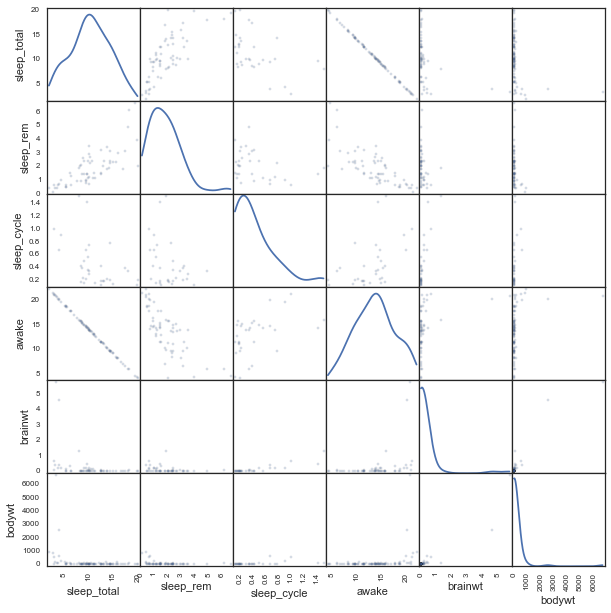

In [6]:
pd.scatter_matrix(spat, figsize=[10, 10], alpha=0.2, diagonal='kde')
spat.describe()

## ** Normal Distributions **

Figure(640x440)


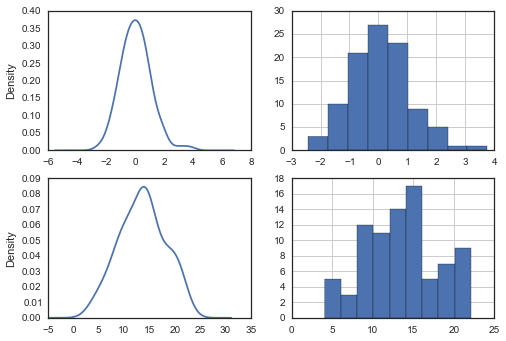

In [7]:
norm = pd.DataFrame({'d': np.random.normal(size=100)})
n_bins = np.abs(spat['awake'].max() - spat['awake'].min())
fig, axes = plt.subplots(nrows=2, ncols=2,)

## New notation: what does the 'ax' argument do?
norm['d'].plot(ax=axes[0, 0], kind='kde')
norm['d'].hist(ax=axes[0, 1], bins=n_bins/2)
spat['awake'].plot(ax=axes[1, 0], kind='kde')
spat['awake'].hist(ax=axes[1, 1], bins=n_bins/2)

print fig

Normal distributions are defined by their mean and standard deviation. We primarily use them in data science as it often describes as a natural state, but also because it's easy to understand and calculate.

Above, it appears that the awake hours (or sleeping hours, as that is 24 - awake hours) seems to fit pretty close to a normal distribution---but how close?

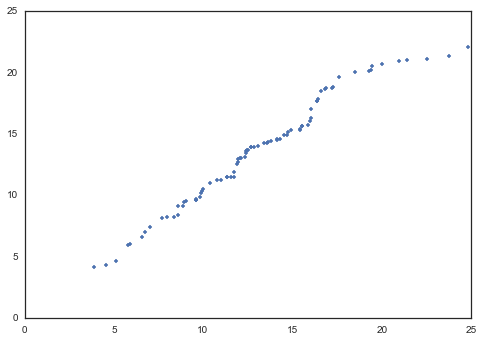

In [8]:
qq = sorted(np.random.normal(spat['awake'].mean(), spat['awake'].std(), len(spat)))
awake = sorted(spat['awake'])

plt.plot(qq, awake, '.')
plt.show()

Above, we're looking at something similar to a "qq plot." QQ plots determine how much your data is similar to a probability distribution. However, doing it the above way is obtrusive and obfuscates what we're handling.

Statsmodels, a statistical library in python, can curate these very quickly for us.

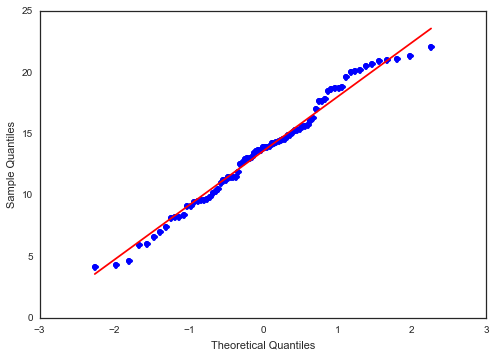

In [10]:
import statsmodels.api as sm
import scipy.stats as stats

# Check sm.qqplot() configurations with shift+tab to see how you can change the distribution you are testing against!
fig = sm.qqplot(spat['awake'], dist=stats.distributions.norm, line='s')
plt.show()

## Heavy tail distributions and power laws

Notice in the data set above, body weight and brain weight are not normally distributed.

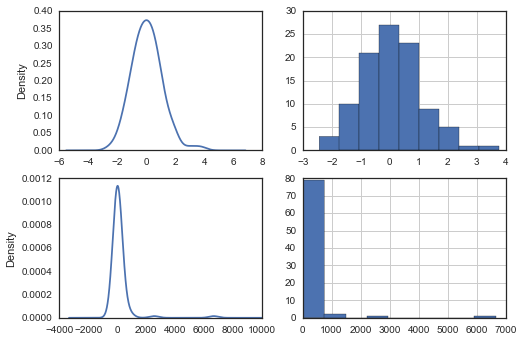

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2,)

norm['d'].plot(ax=axes[0, 0], kind='kde')
norm['d'].hist(ax=axes[0, 1], bins=n_bins/2)
spat['bodywt'].plot(ax=axes[1, 0], kind='kde')
spat['bodywt'].hist(ax=axes[1, 1], bins=n_bins/2)

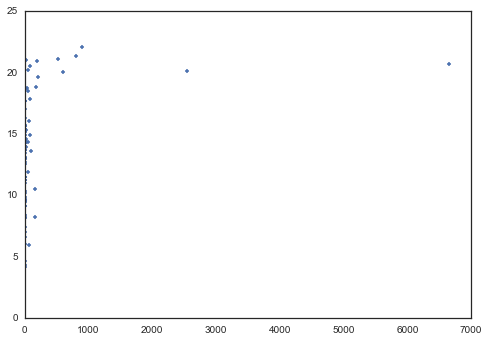

In [12]:
plt.figure()
plt.plot(spat.bodywt, spat.awake, '.')
# Clearly there isn't a linear relationship here.

One way to handle heavy tail data is with a linear transformation.

Transposing the body weight using log manipulates the data into a shape we better understand.

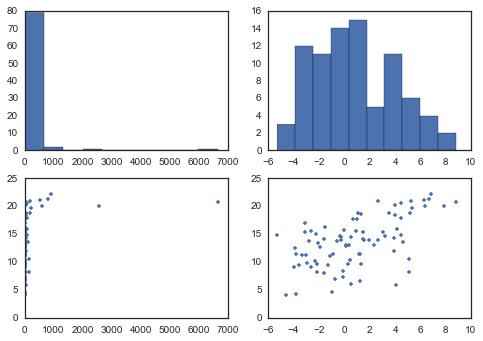

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2,)

ax[0, 0].hist(spat.bodywt)
ax[0, 1].hist(np.log(spat.bodywt))
ax[1, 0].plot(spat.bodywt, spat.awake, '.')
ax[1, 1].plot(np.log(spat.bodywt), spat.awake, '.')

plt.show()

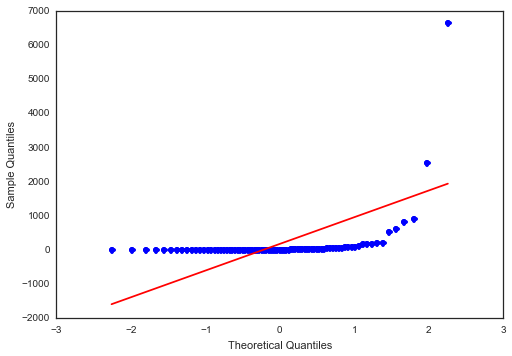

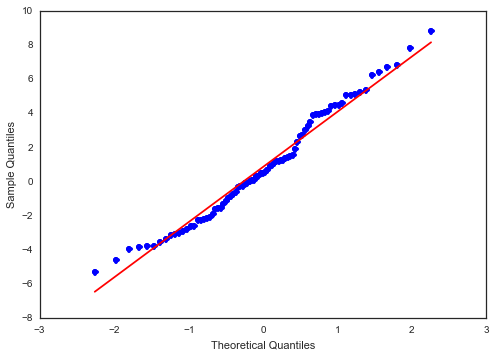

In [14]:
fig = sm.qqplot(spat['bodywt'], dist=stats.distributions.norm, line='s')
plt.show()

fig = sm.qqplot(np.log(spat['bodywt']), dist=stats.distributions.norm, line='s')
plt.show()

Keep in mind that transforming data into some other "space" doesn't mean it's right!

##Understanding how good the relationship is - Linear Regressions

We can also test the relationship between variables given it's statistical significance. A p-value is the probability that a correllation is due to randomness, or by chance. A low p-value means that the result is not due to randomness, while a high p-value means it is due to randomness.

In statsmodels, we can use a coefficient table from the linear model to get our p-values. To start, observe the relationship between body mass and brain mass in the data set.

NORMAL FIT SUMMARY
                            OLS Regression Results                            
Dep. Variable:                brainwt   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Thu, 21 Apr 2016   Prob (F-statistic):           9.16e-26
Time:                        14:42:58   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080        -0.011     0.183
bodywt         0.0010   5.03e-05 

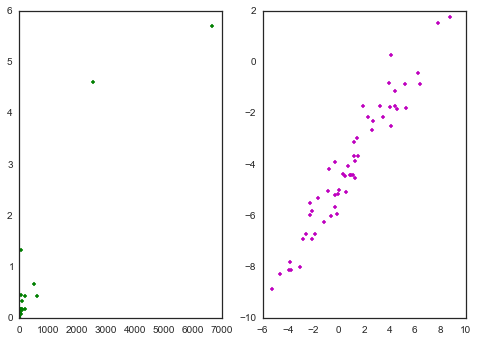

In [15]:
import statsmodels.formula.api as smf
# OLS, or ordinary least squares, takes a y (dependent variable) and X (independent variables) (formula = y ~ X)
# Below, we copy the data frame and remove the na variables, and create a single variable linear model
# to return a test statistic and p-value, to see how strong of a relationship bodyweight and brainweight have.

spat_cleaned_up = pd.DataFrame(spat)
spat_cleaned_up['bodywt'].dropna(inplace=True)
spat_cleaned_up['brainwt'].dropna(inplace=True)
spat_cleaned_up['log_bodywt'] = np.log(spat_cleaned_up['bodywt'])
spat_cleaned_up['log_brainwt'] = np.log(spat_cleaned_up['brainwt'])

fig, axes = plt.subplots(nrows=1,ncols=2)

axes[0].plot(spat_cleaned_up.bodywt, spat_cleaned_up.brainwt, 'g.')

model = smf.ols(formula='brainwt ~ bodywt', data=spat_cleaned_up)
results = model.fit()
print 'NORMAL FIT SUMMARY'
print(results.summary())
print

axes[1].plot(spat_cleaned_up.log_bodywt, spat_cleaned_up.log_brainwt, 'm.')

log_model = smf.ols(formula='log_brainwt ~ log_bodywt', data=spat_cleaned_up)
log_results = log_model.fit()
print 'LOG-LOG FIT SUMMARY'
print(log_results.summary())

print fig

Another functionality of seaborn is that it can print out linear model figures as well. Here we can see the original plots, the model that fits, and a confidence interval.

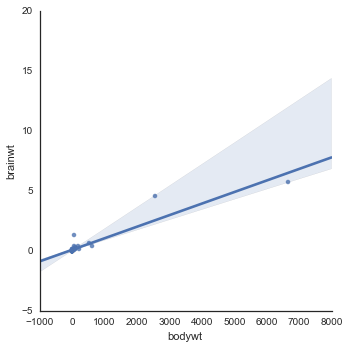

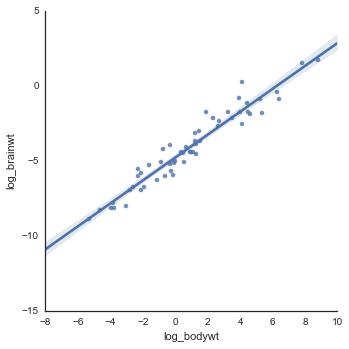

In [16]:
# Original model
print sns.lmplot(x='bodywt', y='brainwt', data=spat_cleaned_up)

# New log-log model
print sns.lmplot(x='log_bodywt', y='log_brainwt', data=spat_cleaned_up)

In [17]:
print sm.stats.anova_lm(log_results, typ=2)
print
print log_results.get_influence().summary_table()

                sum_sq    df           F        PR(>F)
log_bodywt  327.602483   1.0  738.388555  3.562822e-33
Residual     23.958299  54.0         NaN           NaN

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0     -4.167     -5.337      0.037      1.777      0.023      0.272      1.814      0.277
         1     -8.146     -7.808      0.009     -0.523      0.061     -0.133     -0.519     -0.132
         2     -0.860      0.119      0.089     -1.526      0.071     -0.423     -1.546     -0.428
         3     -2.659     -2.756      0.000      0.147      0.023      0.023      0.146      0.022
         4     -2.321     -2.714      0.004      0.597      0.023      0.092      0.593      0.092
         5     -2.163     -2.089      0.00